## Time Series Data Analysis
dataset : crime.csv

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PATH = './data/'
df = pd.read_csv(PATH + 'crime.csv')

In [22]:
import matplotlib.pyplot as plt
plt.rc("font", family="AppleGothic") # 라이브러리 불러오기와 함께 한번만 실행

In [23]:
import warnings

# 경고 무시
warnings.filterwarnings("ignore")

In [24]:
df.head()

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


#### 1.시계열 데이터로 만들기
REPORTED_DATE 컬럼 > Datetime으로

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460911 entries, 0 to 460910
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           460911 non-null  int64  
 1   OFFENSE_TYPE_ID      460911 non-null  object 
 2   OFFENSE_CATEGORY_ID  460911 non-null  object 
 3   REPORTED_DATE        460911 non-null  object 
 4   GEO_LON              457296 non-null  float64
 5   GEO_LAT              457296 non-null  float64
 6   NEIGHBORHOOD_ID      460911 non-null  object 
 7   IS_CRIME             460911 non-null  int64  
 8   IS_TRAFFIC           460911 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 31.6+ MB


In [26]:
df['REPORTED_DATE'] = pd.to_datetime(df['REPORTED_DATE'])

#### 2. 시계열 데이터 인덱스 지정(index)

In [27]:
df = df.set_index('REPORTED_DATE')

#### 3. 인덱스 활용

##### (1) 년, 월, 주말,일별 범죄 통계 확인

In [28]:
temp = df[['IS_CRIME']]

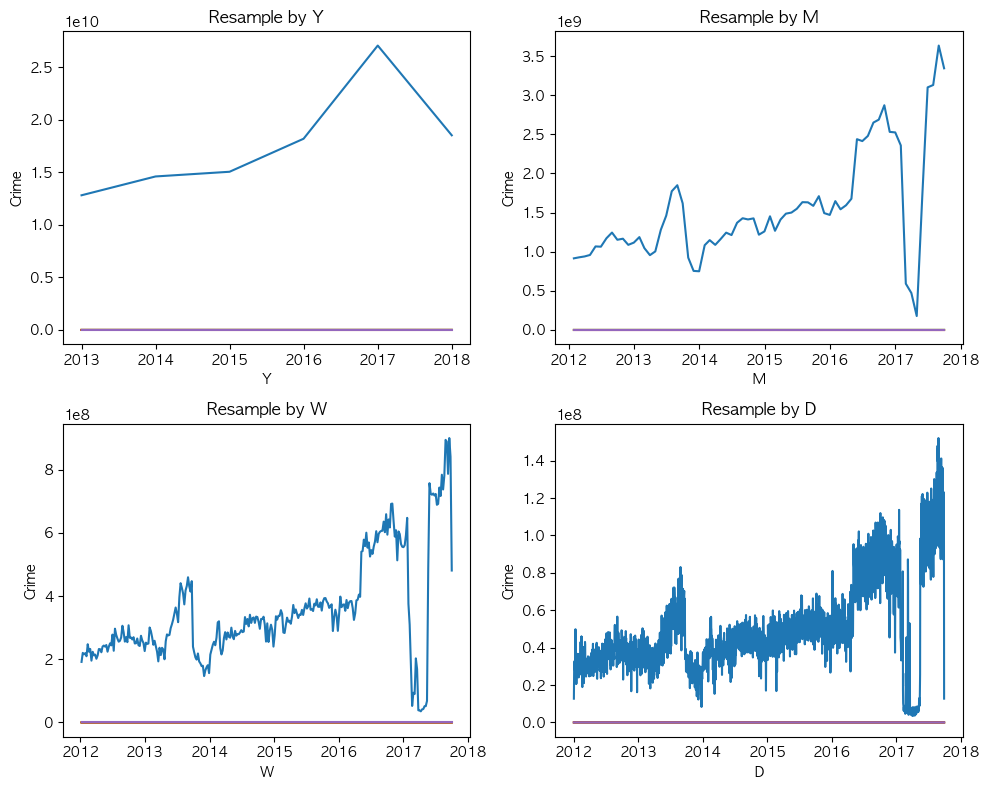

In [29]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

resample_periods = ['Y','M','W','D']
for i, period in enumerate(resample_periods):
    row = i // 2
    col = i % 2
    ax[row, col].plot(df.resample(period).sum())
    ax[row, col].set_xlabel(f'{period}')
    ax[row, col].set_ylabel('Crime')
    ax[row, col].set_title(f'Resample by {period}')

# 레이아웃 조정
plt.tight_layout()
plt.show()

2017년에 가장 많은 범죄가 일어났다.(2013년 중반에 급상승, 2017년 중 범죄발생건수가 급하강하는 시점이 있다.) 원인 분석 필요 

In [30]:
temp.resample('M').sum()

,IS_CRIME
REPORTED_DATE,
2012-01-31,2660
2012-02-29,2353
2012-03-31,2869
2012-04-30,3070
2012-05-31,3321
...,...
2017-05-31,5965
2017-06-30,5972
2017-07-31,6005


In [31]:
temp.between_time('00:00','05:59').sum()

IS_CRIME    53105
dtype: int64

In [32]:
temp.between_time('06:00','11:59').sum()

IS_CRIME    77009
dtype: int64

In [33]:
temp.between_time('12:00','17:59').sum()

IS_CRIME    112220
dtype: int64

In [34]:
temp.between_time('18:00','23:59').sum()

IS_CRIME    93517
dtype: int64

##### (2) 시간대별 범죄발생건수 시각화

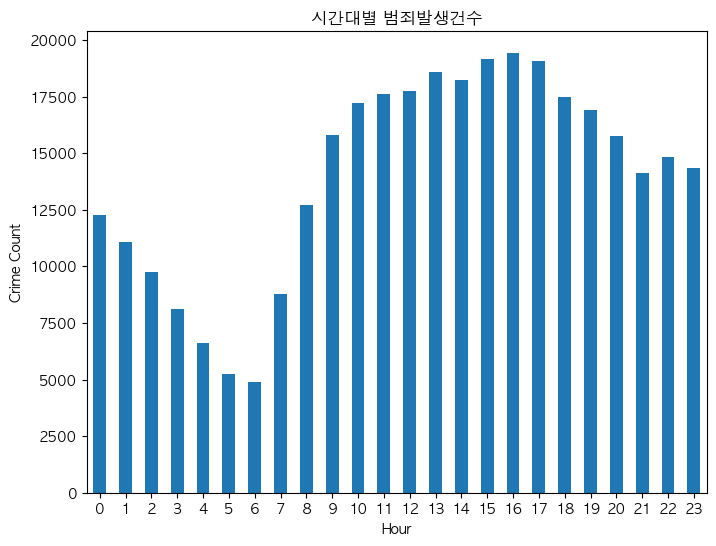

In [43]:
temp['Date'] = temp.index.date
temp['Time'] = temp.index.hour
temp['Month'] = temp.index.month

# 일자와 시간에 따른 범죄 건수 계산
crime_by_hour = temp.groupby('Time')['IS_CRIME'].sum()

# 그래프 시각화
plt.figure(figsize=(8, 6))
crime_by_hour.plot(kind='bar')
plt.title('시간대별 범죄발생건수')
plt.xlabel('Hour')
plt.ylabel('Crime Count')
plt.xticks(rotation=0)
plt.show()

범죄가 가장 적게 발생하는 시간대는 06시이며, 범죄가 가장 많이 일어나는 시간대는 16시이다.

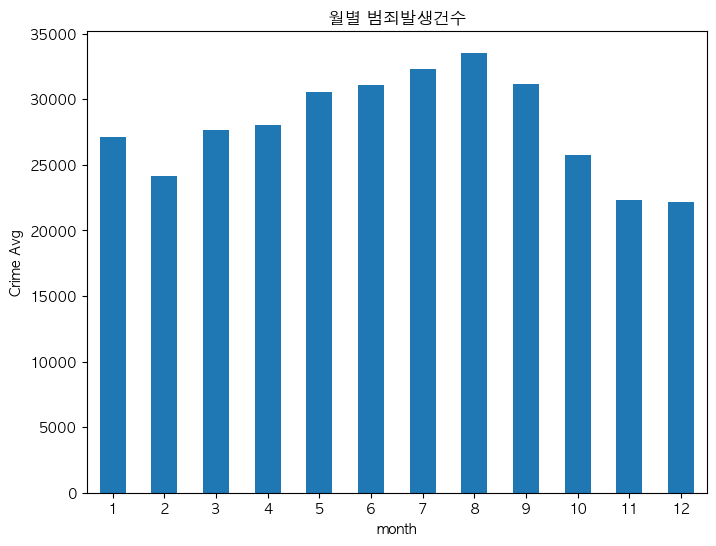

In [46]:
temp['Date'] = temp.index.date
temp['Time'] = temp.index.hour
temp['Month'] = temp.index.month

# 일자와 시간에 따른 범죄 건수 계산
crime_by_hour = temp.groupby('Month')['IS_CRIME'].sum()

# 그래프 시각화
plt.figure(figsize=(8, 6))
crime_by_hour.plot(kind='bar')
plt.title('월별 범죄발생건수')
plt.xlabel('month')
plt.ylabel('Crime Avg')
plt.xticks(rotation=0)
plt.show()

11월과 12월이 상대적으로 범죄발생건수가 적다